<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).


#Our target variable has 4 categories so basically it is a Multiclass classification problem.

#**Following are the 7 major steps of building Machine Learning Model** :
#1.   Collecting Data.
#2.   Preparing the Data
*   Exploratory Data Analysis.
*   feature engineering.


#3.   Choosing a Model
#4.   Training the Model.
#5.   Evaluating the Model.
#6.   Parameter Tuning.
#7.   Making Predictions.

#First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




## Libraries

In [1]:
# Libraries For Exploratory Data Analysis
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

# Sklearn Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing all essential Algorithm For Our Project
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


#Evaluation Metrics For Classification
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc

#importing Optimal Algorithm Search Tool 
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

##Now we are ready to mount the google drive using following code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.Collecting Data.**

#After mounting the gdrive we are ready to load our dataset.
we have mobile price range data.In which we have diffrent observations which give us some intuition about different mobile component effect the price range.


In [3]:
#loading our Dataset
mobile_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile Price Range Prediction - Lovejeet Singh/data_mobile_price_range.csv')

#**2.Preparing the Data**

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [4]:
#Checking the Number of rows and columns using Shape methods
mobile_df.shape

(2000, 21)

#We have 2000 observations/Rows and 21 Features.

#Getting a glimps of our dataset using Head Function. 

In [5]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#Using info() method we can easily get the idea of what kind of data type and null values inside our dataframes we have.

In [6]:
#checking the info 
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#As we can see that the intire dataset holds only numeric values.

In [8]:
#calculating totall null values in our store dataframe
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#as we can see that in our Mobile_df we have zero null values. Which means the data was well maintained.

#Checking the Duplicate Values in our dataset.

In [9]:
# Checking Duplicate Values
value=len(mobile_df[mobile_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#We have zero Duplicated values.

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
#checking the mean mode and median in rossman_df dataset using describe function
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
mobile_df[['sc_w','px_height']].describe()

,sc_w,px_height
count,2000.000000,2000.000000
mean,5.767000,645.108000
std,4.356398,443.780811
min,0.000000,0.000000
25%,2.000000,282.750000
50%,5.000000,564.000000
75%,9.000000,947.250000
max,18.000000,1960.000000


*  ### Px_height - Pixel Resolution Height feature has minimum vakue zero which is not posible 
*  ### Sc_w - Screen Width of mobile in cm feature has also minimum value zero.

#Handling Null Values or Null Values Treatment

* # One Way
##In both the feature we have to replace 0 or missing information by checking its distribution then according to the the chart we have will decide how to fill these zero values with mean, mode and median. 

* # Other Way
##Using KNNImputer we are able to inpute the 0 value to its neighbours value



In [12]:
# Checking How many observations having screen width and px_height value as 0.
print(mobile_df[mobile_df['sc_w']==0].shape[0])
print(mobile_df[mobile_df['px_height']==0].shape[0])

180
2


#As we can see that screen Width has 180 observations has zero values. so we have to convert 0 to np.nan value for our KNNImputer.
#In px_height we can drop those observation which has value as 0. 

In [13]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_df=mobile_df[mobile_df['px_height']!=0]

In [14]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_df['sc_w']=mobile_df['sc_w'].replace(0,np.nan)

#Applying KNNImputer on our dataset it will replace the NAN values by its Nearest Neighbours.

In [15]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(impute_knn.fit_transform(mobile_df),columns=mobile_df.columns)

In [16]:
# Checking shape
mobile_df.shape

(1998, 21)

#So now we have 1998 number of Rows and 21 number of Features/Columns.

#**Exploratory Data Analysis**

In [17]:
#checking the first 5 rows of our dataframe
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


#First we have to check our target feature is class balanced or unbalanced.

In [18]:
# lets have look at our target variable's counts
price_range_counts=mobile_df['price_range'].value_counts()
price_range_counts

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

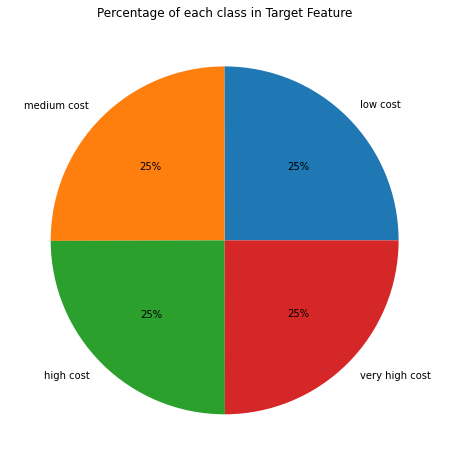

In [19]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
fig,ax=plt.subplots(figsize=(15,8))
plt.pie(price_range_counts, labels=labels, autopct='%.0f%%')
plt.title('Percentage of each class in Target Feature')
plt.show()

#each class have almost equal number of obseravtions for each category. So our target feature is well balanced. Accuracy score will be the best evalaution metric for us to select the model.

##The target variable labels with acooridng to the values.
* #  0=low cost
* #  1=medium cost
* #  2=high cost
* #  3=very high cost

#In this barplot we can see that bigger the battery power higher the price range. which means price range is directly perpostional to battery power.

#Performing Univariate analysis on our Following catagorical columns.
#1.  Blue(Bluetooth)
#2.  Dual_sim
#3.  Four_g
#4.  Three_g
#5.  wifi
#6.  touch_screen

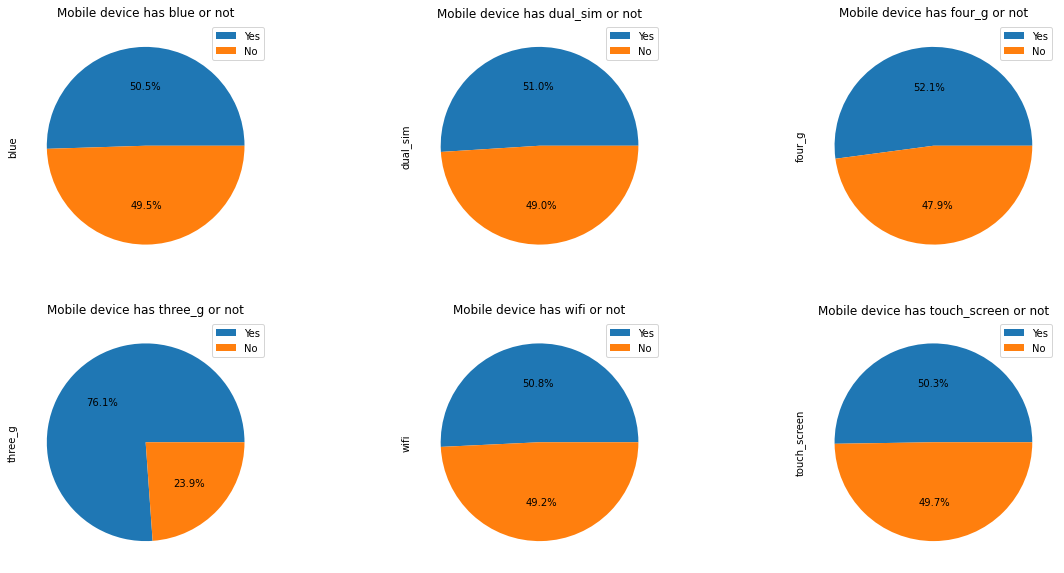

In [20]:
#Analysis catagorical columns
plt.figure(figsize=(20,10))
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
j=1
for i in var_list:
  plt.subplot(2, 3, j)
  j+=1
  mobile_df[i].value_counts().plot.pie (autopct='%1.1f%%',labeldistance=None,labels=labels)
  plt.legend()
# plt.ylabel('')
  plt.title(f'Mobile device has {i} or not')

#In this above Pie chart we can see that most of the catagorical feature has 50% of having feature but a feature called three_g which has 23.9% of device doesn't has this feature. 

#Lets check out how Following features are effect the price range.
#1.  ram
#2.  battery_power
#3.  px_height
#4.  px_width

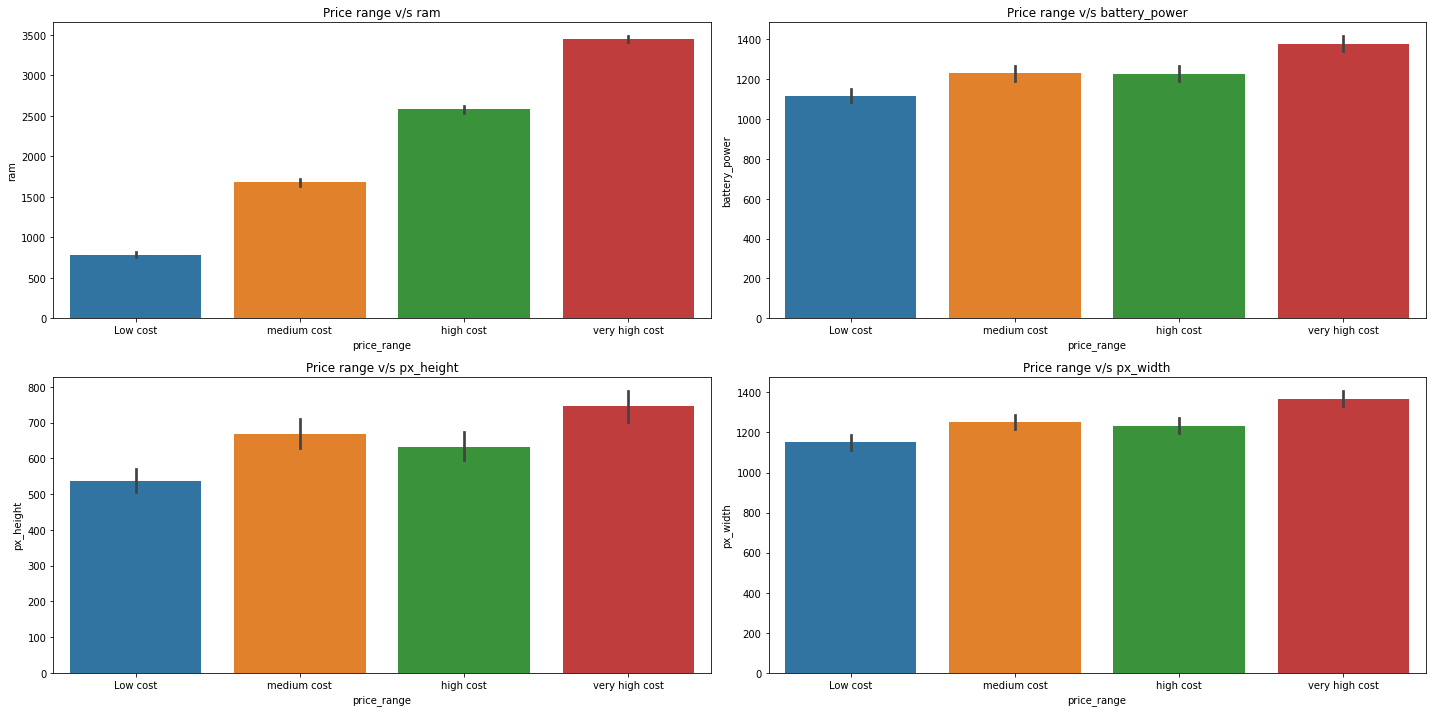

In [21]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))
rows=2   
cols=2
counter=1
features = ['ram','battery_power','px_height','px_width']

for fea in features:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=mobile_df['price_range'],y=mobile_df[fea])
  plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
  plt.title(f'Price range v/s {fea}')
  counter=counter+1
  plt.tight_layout()


#So each barchart shows similar trend. if devices has more battery power or more ram ,So the price range also increases. In other words the price range is directly proportional to Features.

#Now lets check out how different feature effects our price range using lineplot, which shows the trend of each feature with respect to price range.

In [22]:
numeric_features = list(mobile_df.describe().columns)
numeric_features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

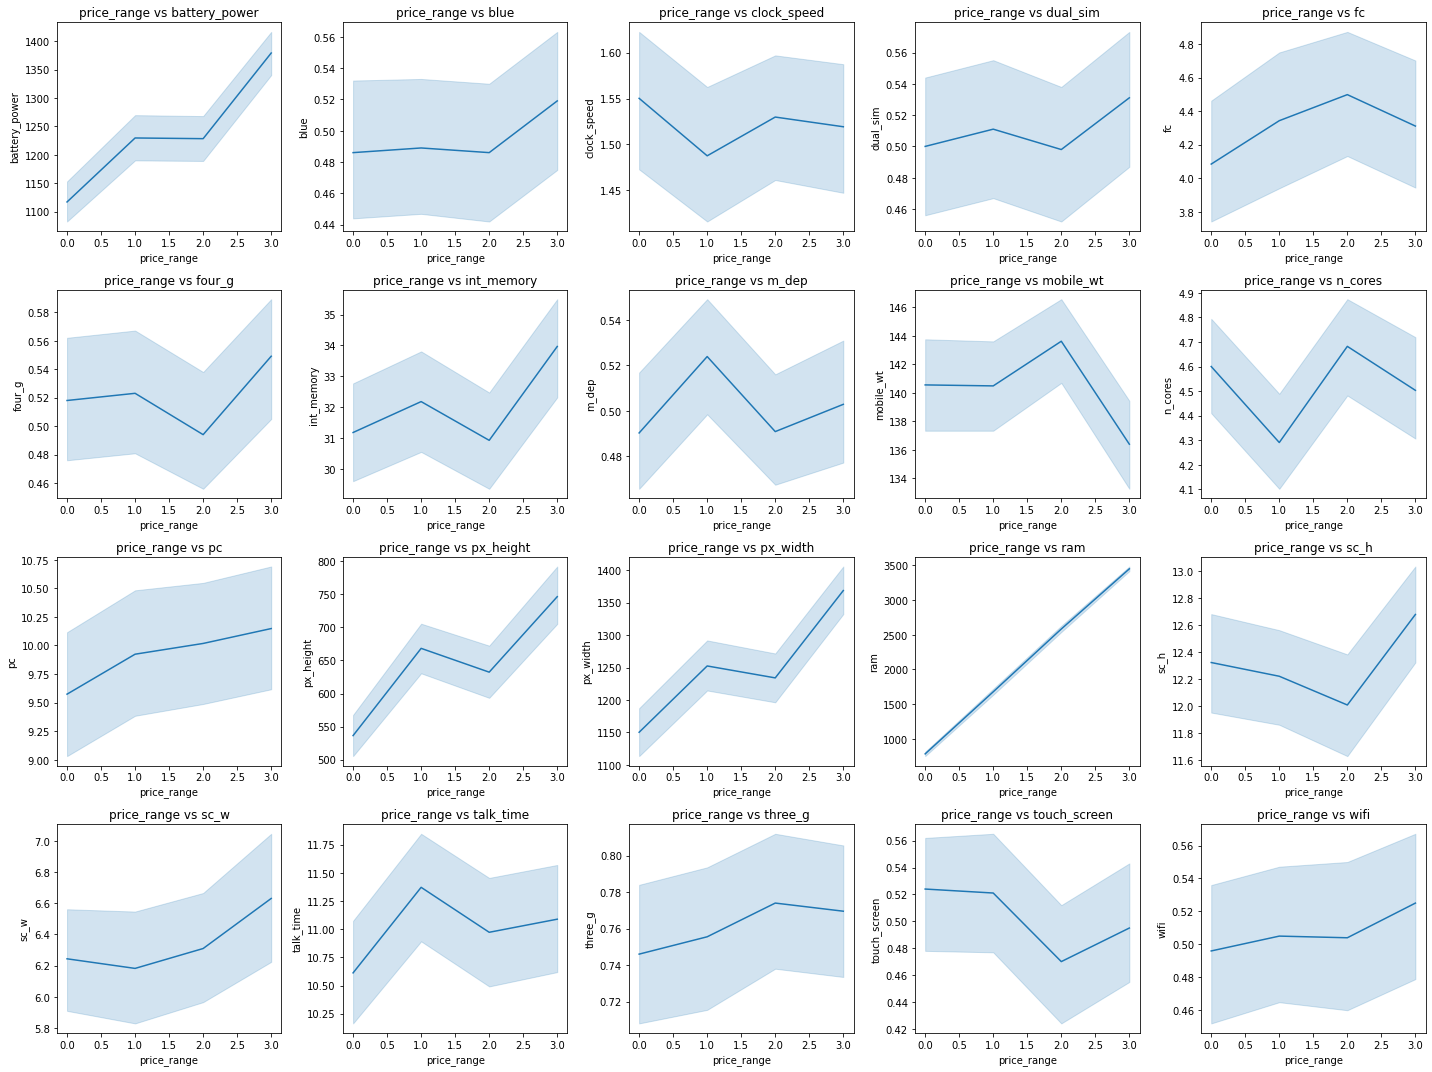

In [23]:
#cheking how feature effect the price range.
rows=4   
cols=5
counter=1
fig = plt.figure(figsize=(20, 15)) 
for col in numeric_features:
  if col not in ['price_range']:
    
    plt.subplot(rows,cols,counter)   
    sns.lineplot(x=mobile_df['price_range'], y=mobile_df[col])
    plt.xlabel('price_range')
    plt.ylabel(col)
    plt.title(f'price_range vs {col}')
    counter=counter+1
    plt.tight_layout()
        

#Lets check out the distribution of our each features

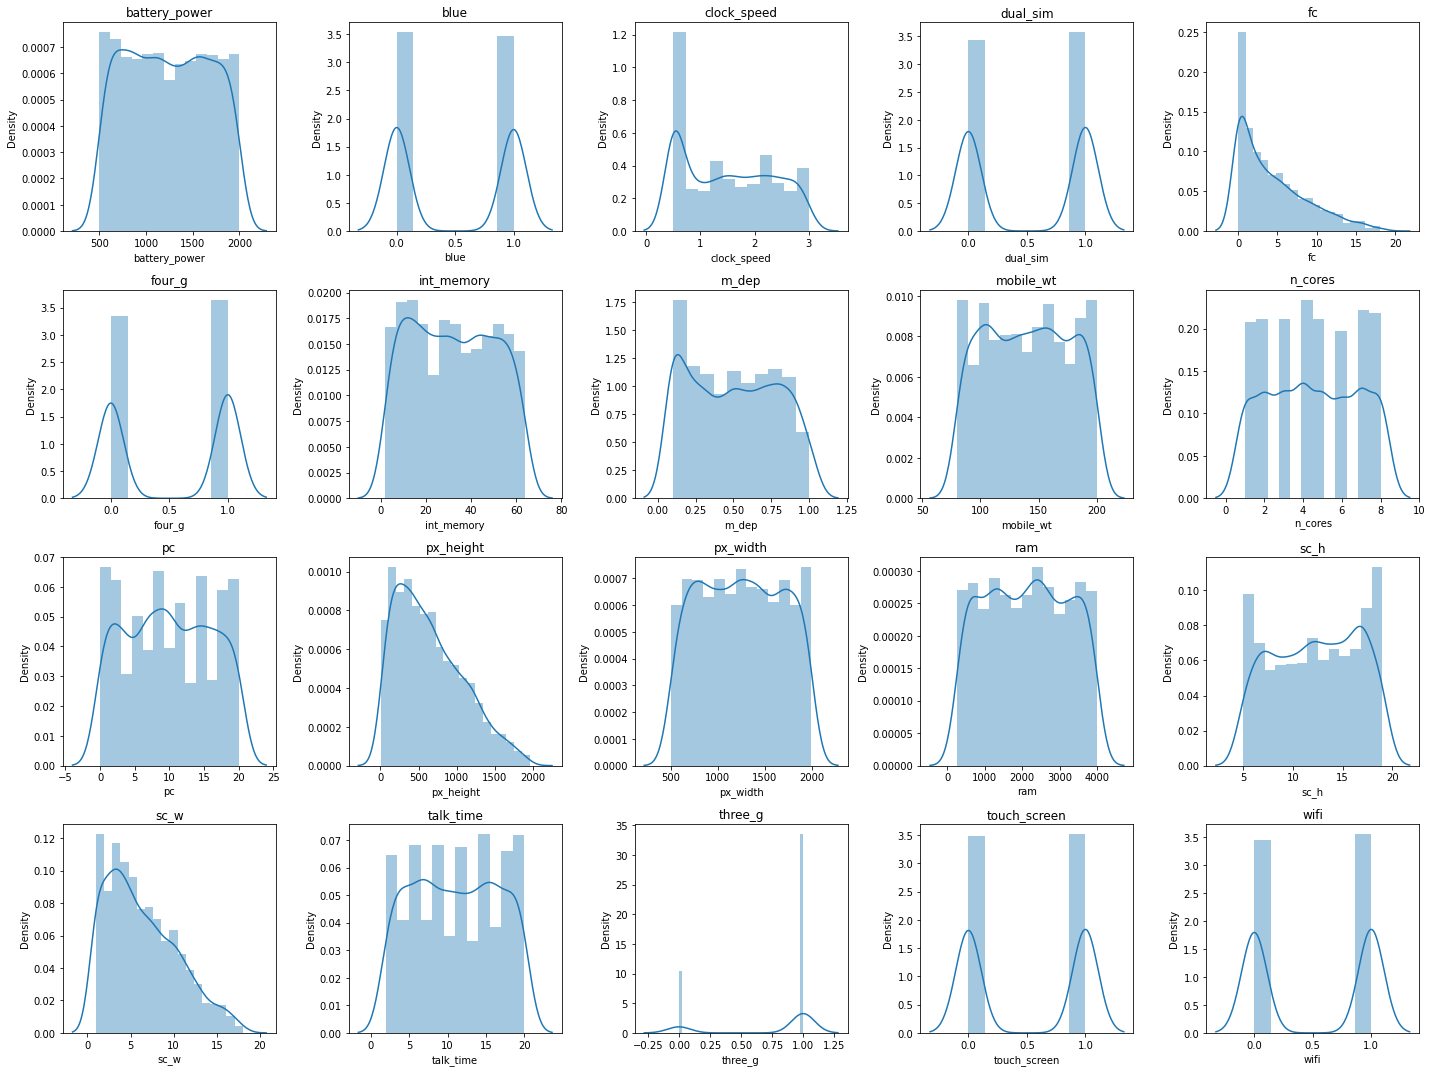

In [24]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)
rows=4   
cols=5
counter=1
fig = plt.figure(figsize=(20, 15)) 

for col in numeric_features[:-1]:
    plt.subplot(rows,cols,counter)
    feature = mobile_df[col]
    sns.distplot(feature)    
    plt.title(col)
    counter=counter+1
    plt.tight_layout()

#Most of our features look like similar to normal distribution. And some feature has multi mode beacuse of those columns has categories, Which hold values like 0 or 1. 

#Looking for outlier using seaborn boxplot.

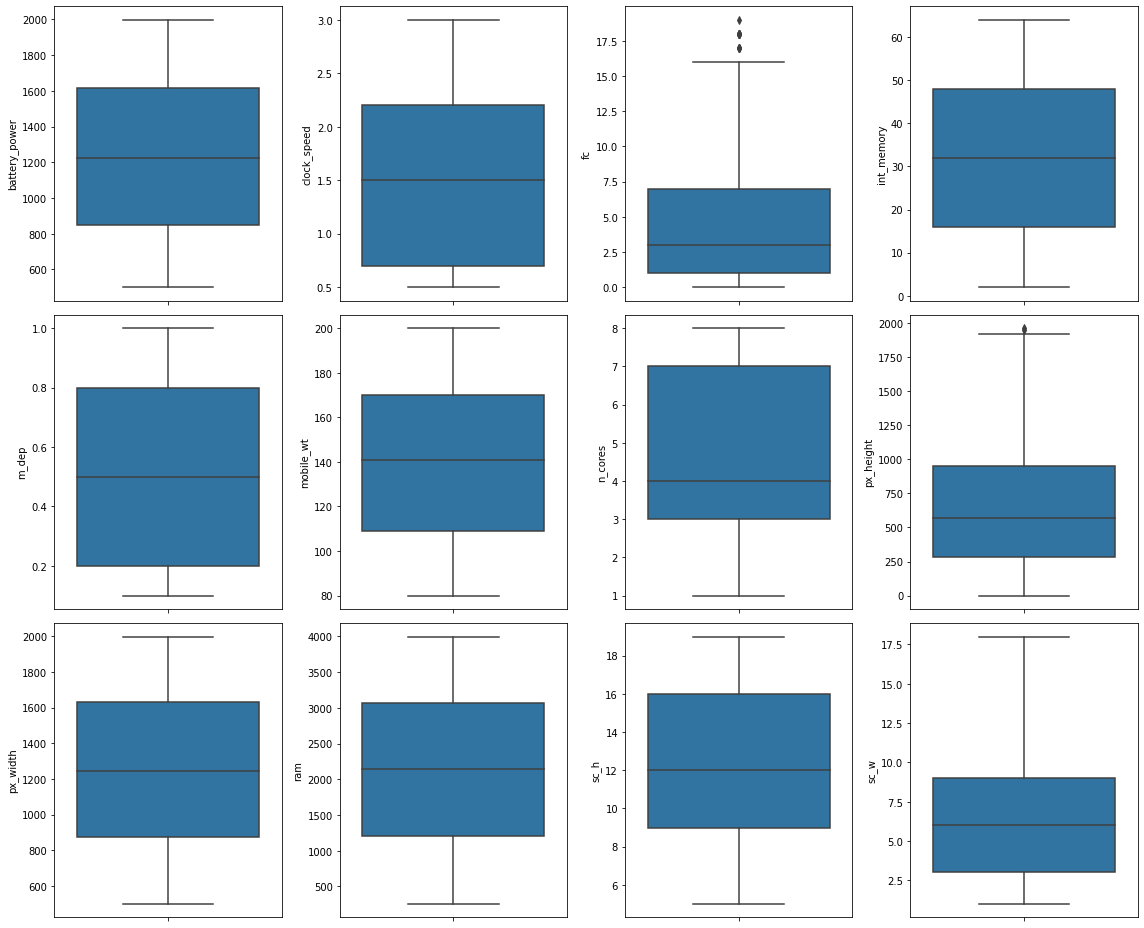

In [25]:
#Looking for outlier
rows=3   
cols=4
counter=1
plt.figure(figsize=(16,13))

for col in numeric_features:
  if col not in ['blue','dual_sim','four_g','three_g','wifi','touch_screen','price_range','talk_time','pc']:    
    plt.subplot(rows,cols,counter)
    sns.boxplot( y=col, data=mobile_df)
    counter=counter+1
    plt.tight_layout()
  

#As we can see that fc and px_height has some outlier so we have to fix them.

#Outlier Treatment using IQR(Interquartile range).

In [26]:
#Capping the outlier rows with Percentiles
upper_lim = mobile_df['fc'].quantile(.95)
lower_lim = mobile_df['fc'].quantile(.05)
mobile_df.loc[(mobile_df["fc"] > upper_lim),"fc"] = upper_lim
mobile_df.loc[(mobile_df["fc"] < lower_lim),"fc"] = lower_lim

In [27]:
#Capping the outlier rows with Percentiles
upper_lim = mobile_df['px_height'].quantile(.95)
lower_lim = mobile_df['px_height'].quantile(.05)
mobile_df.loc[(mobile_df["px_height"] > upper_lim),"px_height"] = upper_lim
mobile_df.loc[(mobile_df["px_height"] < lower_lim),"px_height"] = lower_lim

#Checking out the outlier treated or not.

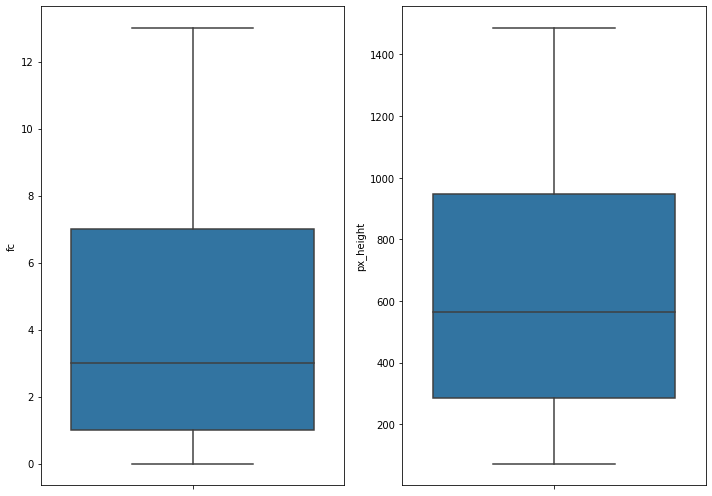

In [28]:
rows=1  
cols=2
counter=1
plt.figure(figsize=(10,7))

for col in ['fc','px_height']:
  plt.subplot(rows,cols,counter)
  sns.boxplot( y=col, data=mobile_df)
  counter=counter+1
  plt.tight_layout()

#As we can see that all the outlier treated and now we have data which has no outlier.

#Now we have to check the multicollinearity only for logistic regression because the Assumption says that.    

*   # There is No Multicollinearity Among Explanatory Variables




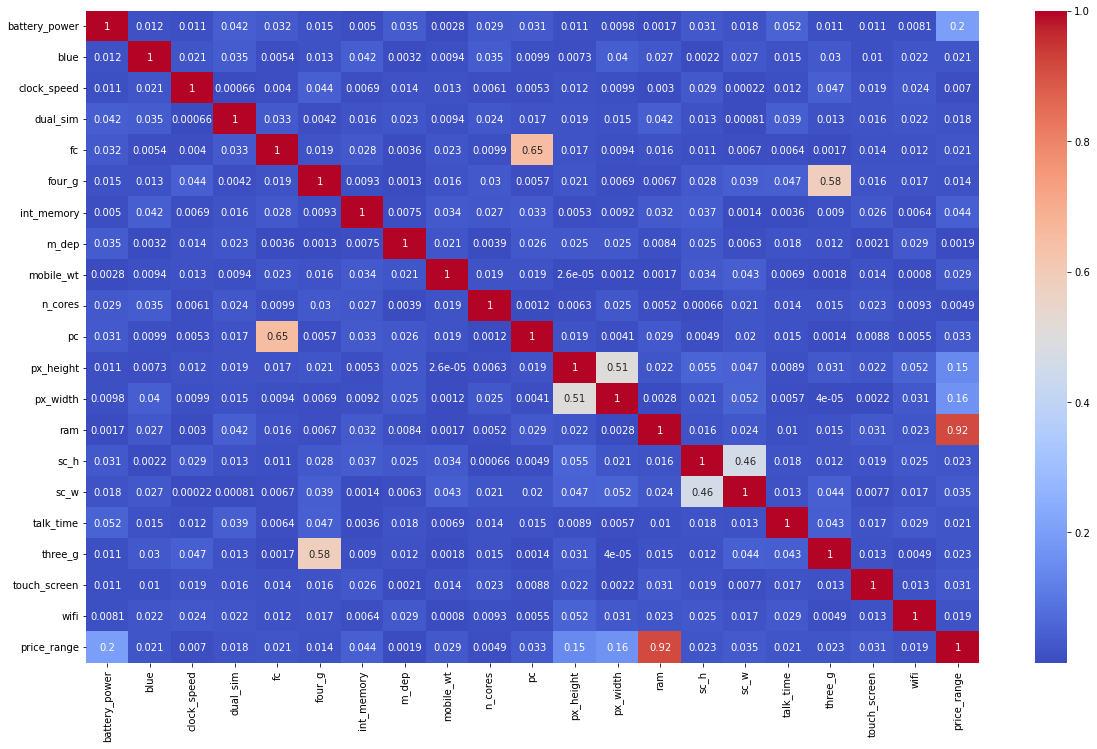

In [29]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = mobile_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

#Feature Engineering 

#We can make a new feature by simply multiple sc_h which is screen height and sc_w which is screen width to create a new feature called screen_area.

In [30]:
#making new feature
mobile_df['screen_area'] = mobile_df['sc_h']*mobile_df['sc_w']

Droping the sc_w and sc_h feature from our mobile_df. 

In [31]:
#Droping the features
mobile_df = mobile_df.drop(columns=['sc_w','sc_h'])

In [32]:
mobile_df.shape

(1998, 20)

In [33]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_area
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,72.7,756.0,2549.0,19.0,0.0,0.0,1.0,1.0,63.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,7.0,1.0,1.0,0.0,2.0,51.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,9.0,1.0,1.0,0.0,2.0,22.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,11.0,1.0,0.0,0.0,2.0,128.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,15.0,1.0,1.0,0.0,1.0,16.0


#Now checking the VIF(Variance inflation factor) only for logistic regression algorithm. rest of other algorithm automaticaly handle the Multicollinearity.

In [34]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
calc_vif(mobile_df[[i for i in mobile_df.describe().columns if i not in ['price_range']]])

,variables,VIF
0,battery_power,7.999994
1,blue,1.979866
2,clock_speed,4.243132
3,dual_sim,2.012806
4,fc,3.585027
5,four_g,3.188527
6,int_memory,3.911078
7,m_dep,3.905595
8,mobile_wt,12.615744
9,n_cores,4.610833


#The Multicollinearity of 'mobile_wt','px_width', sc_h' are little bit high not that much. so we decided to drop these column for our logestic Regression model. Because the the multicollinearity of each independeble feature should be under 10.

In [36]:
calc_vif(mobile_df[[i for i in mobile_df.describe().columns if i not in ['price_range','mobile_wt','px_width']]])

,variables,VIF
0,battery_power,7.534949
1,blue,1.973960
2,clock_speed,4.093746
3,dual_sim,1.981151
4,fc,3.583534
5,four_g,3.186915
6,int_memory,3.841244
7,m_dep,3.794567
8,n_cores,4.437792
9,pc,6.182835


#SO the VIF of each feture is under 10 which is good for our logestic regression model.

#Now creating a copy of our dataset. 

In [37]:
# creating a copy
final_df = mobile_df.copy()

In [38]:
# defining dependent variable
dep_var = 'price_range'

# defining independent variable
indep_var = final_df.columns.drop(['price_range','mobile_wt','px_width'])

#Creating the X,y values for our algorithm.

In [39]:
# Create the data of independent variables
X = final_df[indep_var].values

# Create the dependent variable data
y = final_df[dep_var].values

#Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

##We use stratify to split each class equally.

In [40]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)
print(X_train.shape)
print(X_test.shape)

(1598, 17)
(400, 17)


#We have to scaled our data because some of the algorithm need the data have to be scaled to calculate the distance these algorithm are Support vector machine,K Nearest Neighbour etc. And some of the algorithm doesn't care about scaled data these algoritm are Dicision tree, Random forest etc. but if we gave scalled data to the decision tree and random forest so it will not effect our prediction. 

In [41]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Now Lets implement different models on our dataset:

1.   Logestic Regression. Default penalty L2
   *   with Penalty Elastic Net
2.  Decision Tree
   *   Decision Tree with Optimization
3.  Random Forrest
   *   Random Forrest with Optimization
4.  Gradient Boosting Classifier
   *   Gradient Boosting Classifier with Optimization
5.  XGBoost
   *   XGBoost with Optimization.
6.  K-nearest Neighbour classifier
   *   K-nearest Neighbour classifier with Optimization
7.  Support Vector Machine(SVM)
   *   Support Vector Machine(SVM) with Optimization

#We will be using search algorithms/Optimization for each :

1.  GridSearchCV


#We will be using following Matrics to check our model performance :
1.   Accuracy Score
2.   Classification report
    * Precision
    * Recall
    * F1 Score
3.   AUC-ROC


#Defining a function for our evalution mertic confusion metric plot.

In [42]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC',dpi=300);  

In [43]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

#Model Implementation

#1.  Logestic Regression

In [44]:
logestic_reg = LogisticRegression(random_state=31,
                                  solver='lbfgs', max_iter=100,
                                  multi_class='multinomial',
                                  verbose=2)
logestic_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(multi_class='multinomial', random_state=31, verbose=2)

In [45]:
# Predicting y values of train and test data.
y_train_pred = logestic_reg.predict(X_train)
y_pred = logestic_reg.predict(X_test)

In [46]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

0.9148936170212766

In [47]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.895

In [48]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97,  3,  0,  0],
       [10, 85,  5,  0],
       [ 0,  5, 88,  7],
       [ 0,  0, 12, 88]])

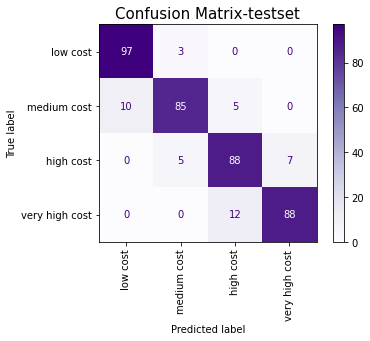

In [49]:
# plotting confusion matrix for test set.
plot_confusion_matrix(logestic_reg,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [50]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       400
         1.0       0.89      0.90      0.89       399
         2.0       0.87      0.87      0.87       400
         3.0       0.94      0.94      0.94       399

    accuracy                           0.91      1598
   macro avg       0.92      0.91      0.91      1598
weighted avg       0.92      0.91      0.91      1598



In [51]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       100
         1.0       0.91      0.85      0.88       100
         2.0       0.84      0.88      0.86       100
         3.0       0.93      0.88      0.90       100

    accuracy                           0.90       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.90      0.89       400



In [52]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Logestic regression classifier ',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=pd.DataFrame(dict1,index=[1])

#Logestic Regression with ElasticNet Panelty

In [53]:
logestic_reg_els = LogisticRegression(random_state=31,
                                  solver='saga', max_iter=100,
                                  multi_class='multinomial',
                                  verbose=2,
                                  penalty='elasticnet',
                                  l1_ratio=0.5)
logestic_reg_els.fit(X_train, y_train)

convergence after 61 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(l1_ratio=0.5, multi_class='multinomial',
                   penalty='elasticnet', random_state=31, solver='saga',
                   verbose=2)

In [54]:
# Predicting y values of train and test data.
y_train_pred = logestic_reg_els.predict(X_train)
y_pred = logestic_reg_els.predict(X_test)

In [55]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

0.9173967459324155

In [56]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8925

In [57]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97,  3,  0,  0],
       [ 9, 86,  5,  0],
       [ 0,  6, 87,  7],
       [ 0,  0, 13, 87]])

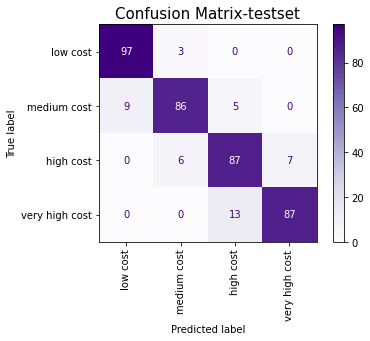

In [58]:
# plotting confusion matrix for test set.
plot_confusion_matrix(logestic_reg_els,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [59]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       400
         1.0       0.89      0.91      0.90       399
         2.0       0.88      0.87      0.88       400
         3.0       0.94      0.94      0.94       399

    accuracy                           0.92      1598
   macro avg       0.92      0.92      0.92      1598
weighted avg       0.92      0.92      0.92      1598



In [60]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       100
         1.0       0.91      0.86      0.88       100
         2.0       0.83      0.87      0.85       100
         3.0       0.93      0.87      0.90       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



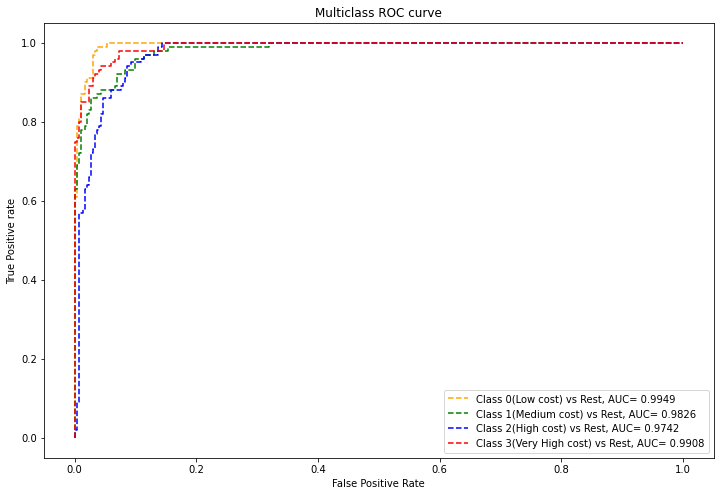

In [61]:
# Plot AUC ROC curve.
pred_prob = logestic_reg_els.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

#After using hyper parameter there is not such changes seen in accuracy.

In [62]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Logestic regression classifier with ElasticNet Penalty',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

# 2.  Decision Tree Classifier

# We have to first take all feature because this algorithm doesn't care about the VIF multicollinearity.

In [63]:
# defining dependent variable
dep_var = 'price_range'

# defining independent variable
indep_var = final_df.columns.drop(['price_range'])

In [64]:
# Create the data of independent variables
X = final_df[indep_var]

# Create the dependent variable data
y = final_df[dep_var]

In [65]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y)
print(X_train.shape)
print(X_test.shape)

(1598, 19)
(400, 19)


In [66]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)


In [68]:
# fitting/training the train set.
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [69]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [70]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [71]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8

In [72]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[92,  8,  0,  0],
       [14, 73, 13,  0],
       [ 0, 16, 71, 13],
       [ 0,  0, 16, 84]])

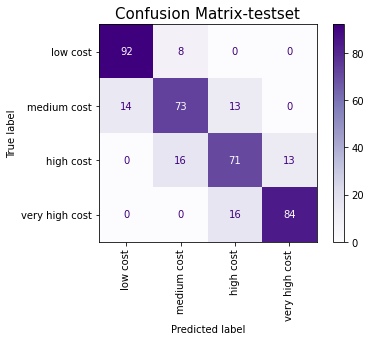

In [73]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [74]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       399
         2.0       1.00      1.00      1.00       400
         3.0       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



In [75]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       100
         1.0       0.75      0.73      0.74       100
         2.0       0.71      0.71      0.71       100
         3.0       0.87      0.84      0.85       100

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



* # Train set accuracy is 100% and test accuracy is 84%.
* # Model is overfitted on train set and did not generalised well.
* # We will tune hyperparamters to reduce overfitting and try to imporve the model performance.

In [76]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Decsion Tree classifier',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#Decsion Tree classifier With GRidSearchCV 

In [77]:
# creating an object of classifier.
dtc_= DecisionTreeClassifier(random_state=0)

In [78]:
# paramter grid values for hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,7,10],
             'max_features':['auto','sqrt','log2',None]}

In [79]:
# applying GridSearchCv and fitting the model with it.
dtc_grid=GridSearchCV(dtc_,
                      param_grid = grid_values,
                      cv=5, scoring = 'accuracy',verbose=2)
dtc_grid.fit(X_train,y_train)   # model fitting.

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 7, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [80]:
# getting best parameters for model.
dtc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_split': 5,
 'splitter': 'best'}

In [81]:
# getting best estimators
dtc_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=0)

In [82]:
# optimal model.
dtc_optimal = dtc_grid.best_estimator_

In [83]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [84]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9931163954943679

In [85]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.865

In [86]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[96,  4,  0,  0],
       [10, 81,  9,  0],
       [ 0,  8, 84,  8],
       [ 0,  0, 15, 85]])

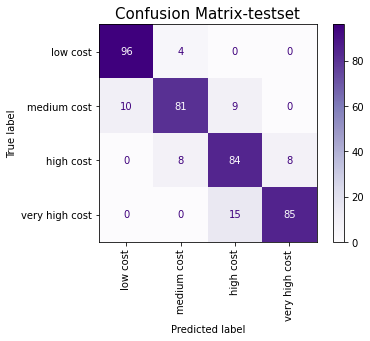

In [87]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [88]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       0.99      0.99      0.99       399
         2.0       0.99      0.99      0.99       400
         3.0       1.00      0.99      0.99       399

    accuracy                           0.99      1598
   macro avg       0.99      0.99      0.99      1598
weighted avg       0.99      0.99      0.99      1598



In [89]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       100
         1.0       0.87      0.81      0.84       100
         2.0       0.78      0.84      0.81       100
         3.0       0.91      0.85      0.88       100

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



In [90]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

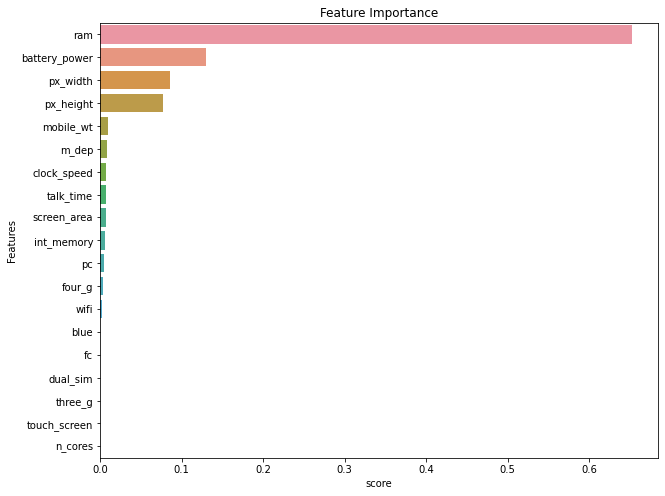

In [91]:
#plotting feature importances
plot_feature_importance(dtc_optimal)

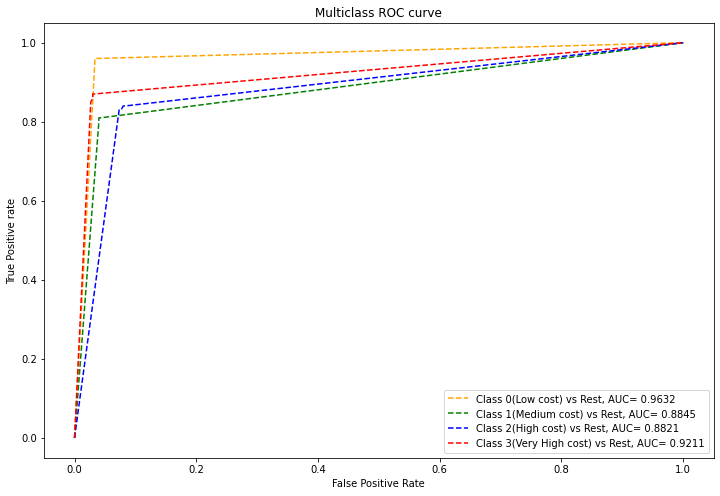

In [92]:
# Plot AUC ROC curve.
pred_prob = dtc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)


* # Train accuarcy has been reduced by 1% and test accuarcy is increased by 6% . Thus we somewhat reduced the overfiiting by increasing the test accuarcy.

* # RAM,battery power,px_height and width came out to be the most important featrures


In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Decsion Tree classifier with GridSearchCV',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#2.  Random Forest classifier

In [94]:
# creating an object of the classifier.
rfc=RandomForestClassifier(random_state=0)

In [95]:
# fitting/training the model.
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [96]:
# predicting the y values of train set and test set.
y_train_pred=rfc.predict(X_train)
y_pred=rfc.predict(X_test)

In [97]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [98]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.895

In [99]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[96,  4,  0,  0],
       [10, 84,  6,  0],
       [ 0,  4, 90,  6],
       [ 0,  0, 12, 88]])

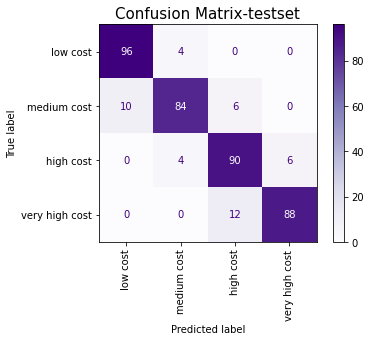

In [100]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [101]:
# printing the classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       399
         2.0       1.00      1.00      1.00       400
         3.0       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



In [102]:
# printing the classification report for train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       100
         1.0       0.91      0.84      0.87       100
         2.0       0.83      0.90      0.87       100
         3.0       0.94      0.88      0.91       100

    accuracy                           0.90       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.90      0.89       400



* # Train accuarcy is 100% and test accuracy is 90%. Which means model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.
* # we do some hyperparameter tunning to reduce overfitting

In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random Forest classifier',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#Random Forest classifier With GridSearchCV

In [104]:
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[50, 80, 100],
          'max_depth':[4,6,8],
          'min_samples_split':[3,5,7,10],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }

In [105]:
# creating the instance 
rfc_= RandomForestClassifier(random_state=1)

In [106]:
# Applying GridSearchCV
rfc_grid=GridSearchCV(rfc_,
                      param_grid=grid_values,
                      cv=5,verbose=2,scoring='accuracy')
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=3, n_estimators=80; total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': [3, 5, 7, 10],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [107]:
#Getting best paramters for the models
rfc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 100}

In [108]:
# fitting/training the data with best parameters.
rfc_optimal=rfc_grid.best_estimator_

In [109]:
# predicting y values of train and test set.
y_train_pred=rfc_optimal.predict(X_train)
y_pred=rfc_optimal.predict(X_test)

In [110]:
# checking the train accuracy score.
accuracy_score(y_train,y_train_pred)

0.990613266583229

In [111]:
# checking the test accuracy score.
accuracy_score(y_test,y_pred)

0.8725

In [112]:
# getting confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97,  3,  0,  0],
       [12, 81,  7,  0],
       [ 0, 10, 81,  9],
       [ 0,  0, 10, 90]])

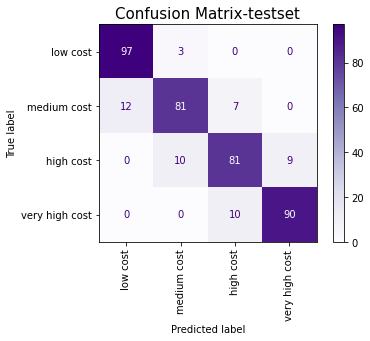

In [113]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rfc_optimal,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [114]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       0.98      0.98      0.98       399
         2.0       0.98      0.98      0.98       400
         3.0       1.00      1.00      1.00       399

    accuracy                           0.99      1598
   macro avg       0.99      0.99      0.99      1598
weighted avg       0.99      0.99      0.99      1598



In [115]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       100
         1.0       0.86      0.81      0.84       100
         2.0       0.83      0.81      0.82       100
         3.0       0.91      0.90      0.90       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



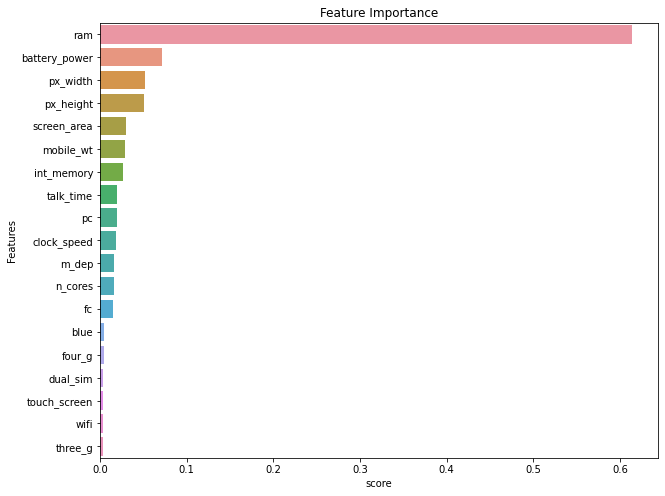

In [116]:
#plotting feature importances
plot_feature_importance(rfc_optimal)

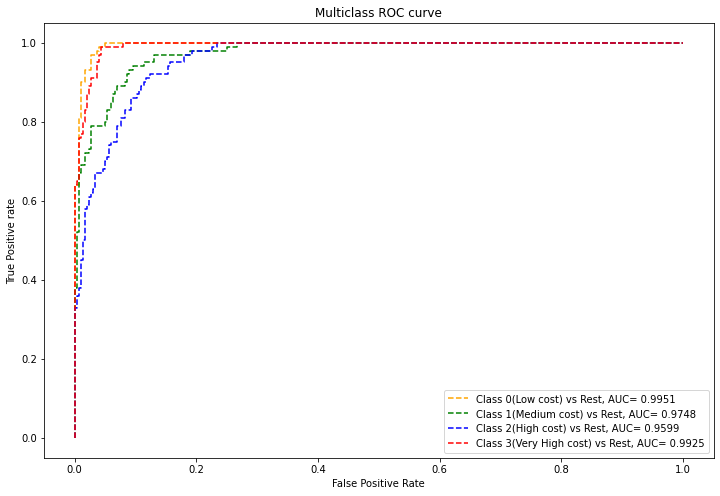

In [117]:
# Plot AUC ROC curve.
pred_prob = rfc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)



#we have slightly improved the model and overfitting is reduced a little bit.
#But this model is not optimal. because the difference between the accuracy score on test and train set is about 10%. Which means that random forest algorithm could not learn the data. Or In other words random forest classifier is not a good algorithm for this problem.



In [118]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random Forest classifier With GridSearchCV',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#3.  Gradient Boosting Classifier

In [119]:
# creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [120]:
# fittng/training the data.
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [121]:

# predicting y values of train and test set.
y_train_pred=gbc.predict(X_train)
y_pred=gbc.predict(X_test)

In [122]:
# checking the accuracy score of train data.
accuracy_score(y_train,y_train_pred)

0.9987484355444305

In [123]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.9025

In [124]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[98,  2,  0,  0],
       [ 9, 83,  8,  0],
       [ 0,  2, 91,  7],
       [ 0,  0, 11, 89]])

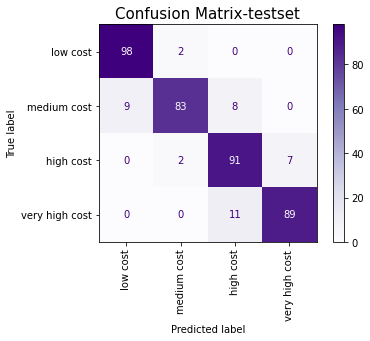

In [125]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [126]:
# printing the classification report for train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       399
         2.0       1.00      0.99      1.00       400
         3.0       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



In [127]:
# printing the classification report for train set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       100
         1.0       0.95      0.83      0.89       100
         2.0       0.83      0.91      0.87       100
         3.0       0.93      0.89      0.91       100

    accuracy                           0.90       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.90      0.90       400



In [128]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting Classifier',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#Gradient Boosting Classifier With GridSearchCV





In [129]:
# Creating an object of the classifier
gbc=GradientBoostingClassifier(random_state=0)

In [130]:
# para_grid values to pass in gridsearchcv.
grid_values={'learning_rate':[0.0001,0.001,0.01,0.1,1,2,3,4],
             'min_samples_split':[6,10,20,30,40],
             'n_estimators': [50, 80, 100]
          
             }

In [131]:
# Applying GridSearchCV
gbc_grid=GridSearchCV(gbc,
                      param_grid=grid_values,
                      cv=3,verbose=2,
                      scoring='accuracy')
gbc_grid.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=80; total time=   1.3s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=80; total time=   1.3s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=80; total time=   1.3s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.0001, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END learning_rate=0.0001, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.0001, min_samples_split=10, 

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3,
                                           4],
                         'min_samples_split': [6, 10, 20, 30, 40],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [132]:
# Getting best parameters
gbc_grid.best_params_

{'learning_rate': 1, 'min_samples_split': 10, 'n_estimators': 80}

In [133]:
# getting best estimators
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=1, min_samples_split=10,
                           n_estimators=80, random_state=0)

In [134]:
# Getting optimal model
gbc_optimal=gbc_grid.best_estimator_

In [135]:
# predicting the y values of train and test set.
y_train_pred=gbc_optimal.predict(X_train)  
y_pred=gbc_optimal.predict(X_test)

In [136]:
# train set accuracy score
accuracy_score(y_train,y_train_pred)

1.0

In [137]:
# test set accuracy score
accuracy_score(y_test,y_pred)

0.915

In [138]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97,  3,  0,  0],
       [ 7, 85,  8,  0],
       [ 0,  2, 95,  3],
       [ 0,  0, 11, 89]])

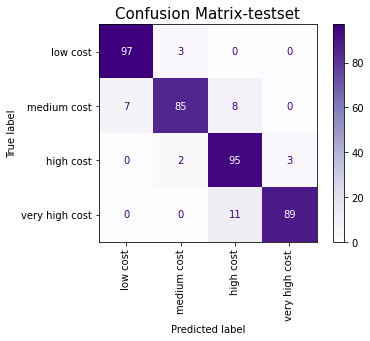

In [139]:
# plotting confusion matrix for test set.
plot_confusion_matrix(gbc_optimal,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [140]:
# printing the classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       399
         2.0       1.00      1.00      1.00       400
         3.0       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



In [141]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       100
         1.0       0.94      0.85      0.89       100
         2.0       0.83      0.95      0.89       100
         3.0       0.97      0.89      0.93       100

    accuracy                           0.92       400
   macro avg       0.92      0.91      0.92       400
weighted avg       0.92      0.92      0.92       400



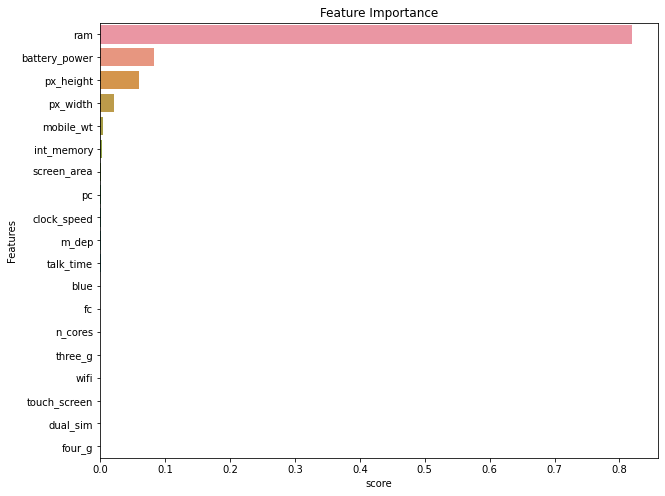

In [142]:
#plotting feature importances
plot_feature_importance(gbc_optimal)

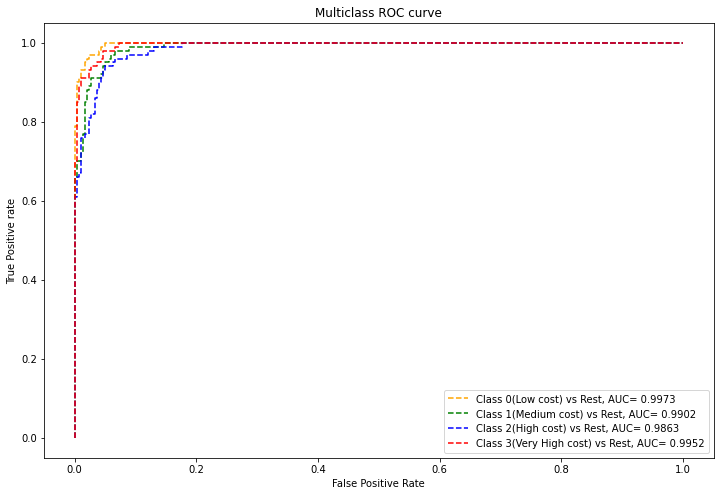

In [143]:
# Plot AUC ROC curve.
pred_prob = gbc_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)


#Before tunning
* # Train accuracy score= 100%.
* # Test accuracy score= 90%

#Model did not generalised well and overfitted the training data. so we tuned hyperparameters of model.

#After Hyperparameter Tuning
* # Train accuracy score= 100%
* # Test accuarcy score=92%

# the model is not best.





#From ROC curve it's clear that model was good to classify the class 0 and class 3.From the classification report its clear that recall for class 0 and class 3 is also good which is 96% and 90% respectively.


In [144]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting Classifier With GridSearchCV',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#4.  XGBoost Classifier

In [145]:
# creating an object of the classifier
xgb=XGBClassifier() 
# fitting the data 
xgb.fit(X_train,y_train)      

XGBClassifier(objective='multi:softprob')

In [146]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [147]:
# checking the accuracy score of train set 
accuracy_score(y_train,y_train_pred)

0.9887359198998749

In [148]:
# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.895

In [149]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[97,  3,  0,  0],
       [ 8, 84,  8,  0],
       [ 0,  3, 90,  7],
       [ 0,  0, 13, 87]])

In [150]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       400
         1.0       0.98      0.99      0.98       399
         2.0       0.98      0.98      0.98       400
         3.0       1.00      0.99      0.99       399

    accuracy                           0.99      1598
   macro avg       0.99      0.99      0.99      1598
weighted avg       0.99      0.99      0.99      1598



In [151]:
# printing the classification report of the test set
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       100
         1.0       0.93      0.84      0.88       100
         2.0       0.81      0.90      0.85       100
         3.0       0.93      0.87      0.90       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



***Train accuracy = 99%***
***Test Accuarcy= 90 %***

In [152]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XGBoost Classifier',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#XGBoost Classifier With GridSearchCV

In [153]:
# parameter grid values for GridSearchCv 
grid_values={
          'learning_rate':[0.001,0.01,0.1,1,2],
          'n_estimators':[50,100,150],
          'gamma':[0.3,0.2,0.1],
          'subsample':[0.4,0.5,0.6]
          }

In [154]:
# creating an object of the classifier
xgb = XGBClassifier()

# applying girdsearchcv 
xgb_grid = GridSearchCV(xgb, grid_values, cv=3,verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.4; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.4; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.4; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.5; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=50, subsample=0.6; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.001, n_estimators=100, subsample=0.4; total time=   0.4s
[CV] END gamma=0

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'gamma': [0.3, 0.2, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 2],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.4, 0.5, 0.6]},
             verbose=2)

In [155]:
# getting thge best parameters
xgb_grid.best_params_

{'gamma': 0.3, 'learning_rate': 0.1, 'n_estimators': 150, 'subsample': 0.6}

In [156]:
#Getting optimal model
xgb_opti = xgb_grid.best_estimator_

In [157]:
y_train_pred=xgb_opti.predict(X_train)
y_pred=xgb_opti.predict(X_test)

In [158]:
accuracy_score(y_train,y_train_pred)

0.9981226533166458

In [159]:
accuracy_score(y_test,y_pred)

0.9125

In [160]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[98,  2,  0,  0],
       [ 8, 85,  7,  0],
       [ 0,  2, 94,  4],
       [ 0,  0, 12, 88]])

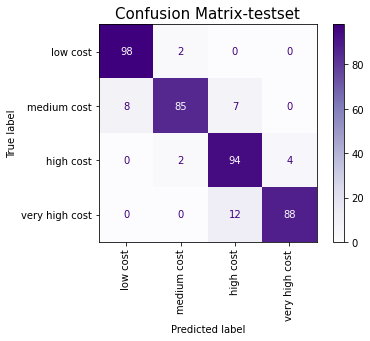

In [161]:
# plotting confusion matrix for test set.
plot_confusion_matrix(xgb_opti,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [162]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       0.99      1.00      1.00       399
         2.0       1.00      1.00      1.00       400
         3.0       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



In [163]:
#printing the classifiaction report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       100
         1.0       0.96      0.85      0.90       100
         2.0       0.83      0.94      0.88       100
         3.0       0.96      0.88      0.92       100

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



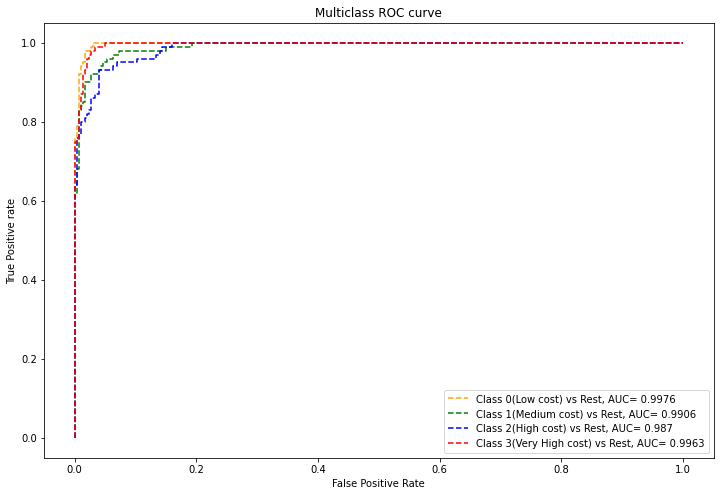

In [164]:
# Plot AUC ROC curve.
pred_prob = xgb_opti.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

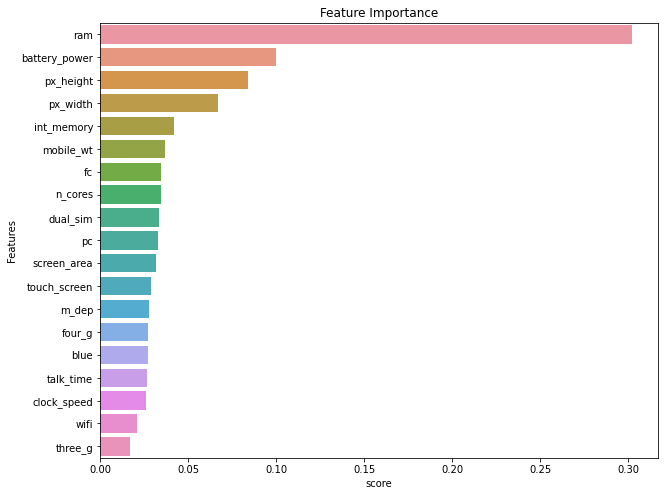

In [165]:
#plotting feature importances
plot_feature_importance(xgb_opti)



#Before hyperparameter Tuning
* # Train Accuarcy = 99%
* # Test Accuarcy = 90%

#After hyperparameter Tuning
* # Train Accuarcy = 100%
* # Test Accuarcy = 91%

#As we can see that our model still look like overfited.

#From AUC-ROC curve its clear that model has almost correctly predicted the class 0 and class 3.


In [166]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XGBoost Classifier With GridSearchCV',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#5.  K Nearest Neighbors

In [167]:
# creating an object of the classifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',algorithm='kd_tree')    
#  fitting the data 
knn.fit(X_train,y_train)   

KNeighborsClassifier(algorithm='kd_tree')

In [168]:
# predicting the y values of train and test set.
y_train_pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [169]:
# checking the accuracy score of train set
accuracy_score(y_train,y_train_pred)

0.7040050062578223

In [170]:
# Checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.515

In [171]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[68, 29,  3,  0],
       [32, 43, 21,  4],
       [13, 32, 43, 12],
       [ 2,  9, 37, 52]])

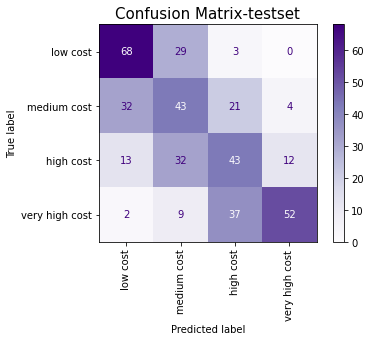

In [172]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [173]:
# printing the classification report of test set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       400
         1.0       0.58      0.66      0.62       399
         2.0       0.66      0.59      0.62       400
         3.0       0.88      0.69      0.77       399

    accuracy                           0.70      1598
   macro avg       0.71      0.70      0.70      1598
weighted avg       0.71      0.70      0.70      1598



In [174]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63       100
         1.0       0.38      0.43      0.40       100
         2.0       0.41      0.43      0.42       100
         3.0       0.76      0.52      0.62       100

    accuracy                           0.52       400
   macro avg       0.54      0.52      0.52       400
weighted avg       0.54      0.52      0.52       400



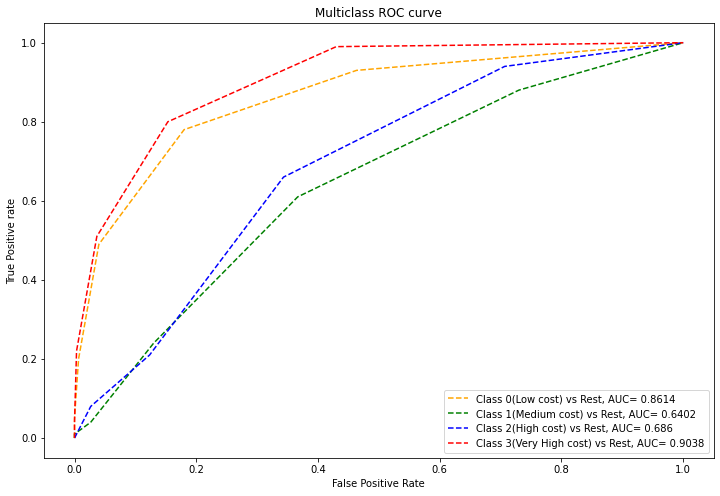

In [175]:
# Plot AUC ROC curve.
pred_prob = knn.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)

#KNN Algorithm could not able to learn the data. the accuracy score on train set is 0.70 and 0.52 on test set.

In [176]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'K Nearest Neighbors',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#K Nearest Neighbors With GridSearchCv

In [177]:
# creating an object of classifier
knn=KNeighborsClassifier()

In [178]:
# parameter grid values.
grid_values = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41],
               'algorithm':['ball_tree','kd_tree','brute'],
               'leaf_size':[4,6,8,10],
               'metric':['euclidean','manhattan','minkowski']}

In [179]:
# applyong GridSearchCv with above grid values and cv=5
knn_grid=GridSearchCV(knn,
                      cv=5,scoring='accuracy',
                      verbose=3,
                      param_grid=grid_values)
knn_grid.fit(X_train ,y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=1;, score=0.463 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=1;, score=0.463 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=1;, score=0.444 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=1;, score=0.495 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=1;, score=0.467 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=3;, score=0.469 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=3;, score=0.456 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=4, metric=euclidean, n_neighbors=3;, score=0.484 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [4, 6, 8, 10],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39,
                                         41]},
             scoring='accuracy', verbose=3)

In [180]:
# getting thge best parameters
knn_grid.best_params_                     

{'algorithm': 'ball_tree',
 'leaf_size': 4,
 'metric': 'manhattan',
 'n_neighbors': 37}

In [181]:
# Getting optimal Model
knn_optimal = knn_grid.best_estimator_

In [182]:
# predicting y values of train and test set.
y_train_pred=knn_optimal.predict(X_train)
y_pred=knn_optimal.predict(X_test)

In [183]:
#checking the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.7590738423028786

In [184]:
# checking the accuracy score of test set.
accuracy_score(y_test,y_pred)

0.665

In [185]:
# confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[84, 14,  2,  0],
       [31, 54, 14,  1],
       [ 1, 27, 58, 14],
       [ 0,  5, 25, 70]])

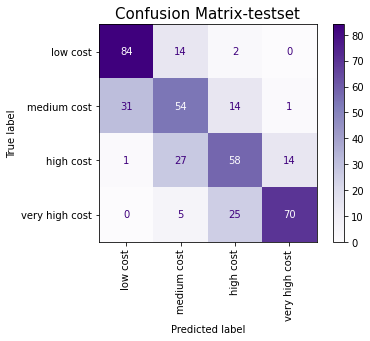

In [186]:
# plotting confusion matrix for test set.
plot_confusion_matrix(knn_optimal,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [187]:
# printig tye classification report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       400
         1.0       0.68      0.69      0.68       399
         2.0       0.67      0.67      0.67       400
         3.0       0.87      0.78      0.82       399

    accuracy                           0.76      1598
   macro avg       0.76      0.76      0.76      1598
weighted avg       0.76      0.76      0.76      1598



In [188]:
# printing the classification report of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78       100
         1.0       0.54      0.54      0.54       100
         2.0       0.59      0.58      0.58       100
         3.0       0.82      0.70      0.76       100

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400



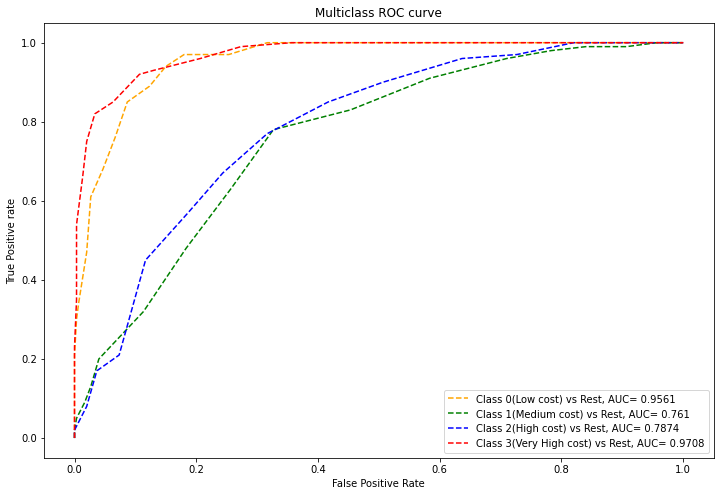

In [189]:
# Plot AUC ROC curve.
pred_prob = knn_optimal.predict_proba(X_test)
plot_Auc_roc(y_test,pred_prob)


#Before hyperparameters tuning

* # Train Accuracy:70 %
* # Test Accuarcy:52 %

KNN Model has performed Not So good As compared to other models. 

After Hyperparameter Tuning:

* # Train Accuarcy: 76%
* # Test Accuarcy: 67%

#Surely we improved the model perfromance and reduced overfitting but however this is not  good model for us.



In [190]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'K Nearest Neighbors With GridSearchCv',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#6.  Support Vector Machine(SVM)

In [191]:
# Import all relevant libraries
from sklearn.svm import SVC

In [192]:
# creating an object of classifier
svc = SVC(random_state=31)  
# fitting the model/training the model.    
svc.fit(X_train,y_train)    

SVC(random_state=31)

In [193]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train)
y_pred=svc.predict(X_test)


In [194]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9856070087609512

In [195]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.8675

In [196]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[88, 12,  0,  0],
       [ 7, 85,  8,  0],
       [ 0, 12, 82,  6],
       [ 0,  0,  8, 92]])

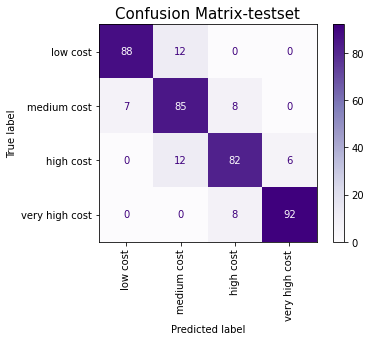

In [197]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svc,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [198]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       400
         1.0       0.98      0.99      0.98       399
         2.0       0.98      0.97      0.98       400
         3.0       0.99      0.98      0.99       399

    accuracy                           0.99      1598
   macro avg       0.99      0.99      0.99      1598
weighted avg       0.99      0.99      0.99      1598



In [199]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       100
         1.0       0.78      0.85      0.81       100
         2.0       0.84      0.82      0.83       100
         3.0       0.94      0.92      0.93       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [200]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Support Vector Machine(SVM)',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

#SVM algorithm seems overfit. we got accuracy score on train set is 0.99 and 0.87 on test set  

#Support Vector Machine(SVM) With GridSearchCV

In [201]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.0001,0.001,0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.001,0.01,1]
}

In [202]:
# creating an object for classifier
svm  = SVC ()

In [203]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
# fitting the data into the model
svm_cv.fit(X_train,y_train)     

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END .....C=0.0001, degree=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .....C=0.0001, degree=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .....C=0.0001, degree=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .....C=0.0001, degree=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .....C=0.0001, degree=1, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .......C=0.0001, degree=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .......C=0.0001, degree=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .......C=0.0001, degree=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .......C=0.0001, degree=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .......C=0.0001, degree=1, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ........C=0.0001, degree=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ........C=0.0001, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'degree': [1, 3, 5, 7], 'gamma': [0.001, 0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [204]:
# getting the best parameters
svm_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [205]:
# getting the best estimators
svm_cv.best_estimator_

SVC(C=10, degree=1, gamma=0.001, kernel='linear')

In [206]:
# Getting the optimal model
svm_optimal = svm_cv.best_estimator_

In [207]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train)    
y_pred=svm_optimal.predict(X_test)

In [208]:
y_train_pred

array([0., 2., 1., ..., 1., 2., 3.])

In [209]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9831038798498123

In [210]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.96

In [211]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[98,  2,  0,  0],
       [ 3, 93,  4,  0],
       [ 0,  1, 98,  1],
       [ 0,  0,  5, 95]])

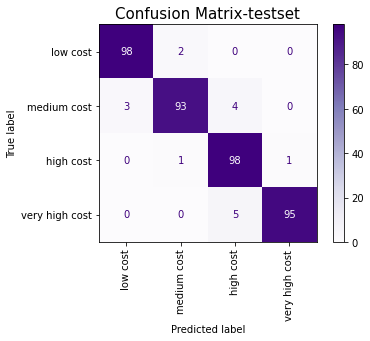

In [212]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svm_optimal,X_test,y_test,cmap='Purples',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [213]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       400
         1.0       0.98      0.97      0.98       399
         2.0       0.97      0.98      0.98       400
         3.0       0.99      0.99      0.99       399

    accuracy                           0.98      1598
   macro avg       0.98      0.98      0.98      1598
weighted avg       0.98      0.98      0.98      1598



In [214]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       100
         1.0       0.97      0.93      0.95       100
         2.0       0.92      0.98      0.95       100
         3.0       0.99      0.95      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



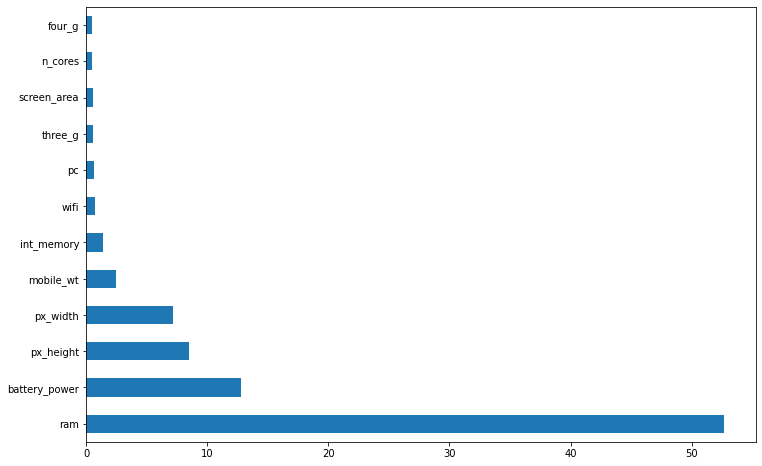

In [215]:
plt.figure(figsize=(12,8))
pd.Series(abs(svm_optimal.coef_[0])+abs(svm_optimal.coef_[1])+abs(svm_optimal.coef_[2])+abs(svm_optimal.coef_[3])+abs(svm_optimal.coef_[4])+abs(svm_optimal.coef_[5]), index=X.columns).nlargest(12).plot(kind='barh')

*  # Accuracy score on 

   *  Train set is 99% 
   *  Test score is 87%.
*  # Model seems to be overfitted as the differance between train and test accuracy score is more than 10%.
*  # After Hyperparameter tuning 
   * Train accuracy 98% 
   * Test accuracy score increased to 96%. 
*  # SVM performed very well as compared to other alogorithms.
*  # RAM,Battery power,px_height and px_weight are the imporatant features.
*  # f1 score is also very good.

In [216]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Support Vector Machine(SVM) With GridSearchCV',
       'Accuracy Score On Train Set':round((accuracy_score(y_train,y_train_pred)),3),
       'Accuracy Score On Test Set':round((accuracy_score(y_test,y_pred)),3)
       
       }
performance_df=performance_df.append(dict1,ignore_index=True)

In [217]:
performance_df

,Model,Accuracy Score On Train Set,Accuracy Score On Test Set
0,Logestic regression classifier,0.915,0.895
1,Logestic regression classifier with ElasticNet...,0.917,0.892
2,Decsion Tree classifier,1.000,0.800
3,Decsion Tree classifier with GridSearchCV,0.993,0.865
4,Random Forest classifier,1.000,0.895
5,Random Forest classifier With GridSearchCV,0.991,0.872
6,Gradient Boosting Classifier,0.999,0.902
7,Gradient Boosting Classifier With GridSearchCV,1.000,0.915
8,XGBoost Classifier,0.989,0.895
9,XGBoost Classifier With GridSearchCV,0.998,0.912


#CONCLUSION
###During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'price_range'. also checking the class balance and we found that our target variable is well balanced. Next we analysed categorical variable like, Blue, Three_g, Four_g, Dual_sim, etc, we also analysed numerical variable, found out the distribution and their relationship with the dependent variable to get to know how independent feature effect the price range.

###For logestic regression we have to check the multicollinearity. we use VIF Function defined by us.Because the Assumptions of logestic regression says that the multicollinearity of independent variable should not be high.

###Rest of the algorithm we use all feature becuase the handles multicollinearity by their own.

##Next we implemented 8 machine learning algorithms which are follows
1. Logestic Regression
2. Decission tree 
3. Random Forest
4. XGBoost 
5. Gredient Boosting
6. Support Vector Machine(SVM)
##We did hyperparameter tuning to improve our model performance using optimal algorithm search tool like GridSearchCV.




1.  Our target variable is well balanced. There is no class imbalance seen. 
2.  The analysis of the catagorical features like blue(bluetooth), dual_sim, touch_screen and four_g we saw that 50% of the devices has these feature and 50% hasn't.
3. The 75% of the devices has feature called three_g.
4.  when we did analysis of the numerical features like ram, battery_power, px_height and px_width h. we found that higher the ram or battary_power its become more expensive or we can say that these features directly proportional to price_range.
5.   The distrubution of the most features look like normal distribution.
6. we found two feature has outlier so we have to treat them using IQR forluma.
7.  The accuracy score for logestic regression we got 0.91 on train set and 0.89 for test set by tuning hyperperameter. which is great.
8. The Decision Tree Classifier model perform good but over fiitng seen. after tuning some hyper parameter the model slightly improved but not that much..
9. The Random forest classifier model perform good but there was some overfiting seen. after tuning hyper parameter the algorithm could not able to reduce overfitng that much.
10. The Gradient Boosting Classifier and XGBoost models performs same as random forest classifier. 
11.  The K Nearest Neighbour algorithm perform worst amoung all the algoritms.
12.  The Support Vector Machine algorithm perform very well after tuning some hyper parameter using optimal algorithm search tool like GridSearchCV.
13.  The Support Vector Machine with Hyper parameter tuning gives accuracy score on train set is 0.98 and 0.95 on test set which  is great. the F1 score is 0.96 on test set. 
14.  the most important features are 'Ram', 'battery_power', 'px_height', 'px_weight' for all the algorithm.
15.  We can say that SVM model is ready to deploy.


